## 什么是人工神经网络

首先必须澄清,人工神经网络和生物神经网络没有必然关系,只是人类为了通俗理解而作的一个比喻.

这不是我的观点,是吴恩达在他的深度学习课程中多次重申的.

人工神经网络(后文简称神经网络)由很多神经元相互链接构成一个网络, 而所谓的链接其实就是计算路径,

所以, 神经网络可以看成是一个计算图, 神经元就是一个计算,链接神经元的边就是数据流通的路径.

下图是一个经典的神经网络. 圆圈代表神经元, 边代表计算路径.

![title](images/nn.png)

通常我们把一个神经网络分为三层: 输入层, 隐藏层和输出层. 输入层其实就是你的输入的数据, 

比如, 我们现在有个向量X=[1,2,3], X的每个元素可以当作输入层神经元的激活值, 

比如第一个神经元的激活值是1, 第二个神经元的激活值是2.

得到了输入层的激活值, 我们接着计算隐藏层的激活值, 如果你懂得点线性代数,
你可以用矩阵的运算得到隐层的激活向量A1:

$$A=sigmoid\left( W_{1}\cdot x\right)$$

W1代表的是输入层和隐藏层之间每个神经元两两连接的线的权重, A1表示图中的[a4,a5,a6,a7], 

sigmoid表示激活函数, 它就是一个函数, 如果不知道可以先不理会. 从上图中, 你可以看出, 

W1的形状是 4x3, 因为隐层是4个神经元, 输入层是3个神经元. 如果你没有学过线性代数, 

那么你学习机器学习还是很有难度的, 但是没关系, 我这里列出计算隐层第一个神经元激活量a4的公式:

$$a_{4}=sigmoid(x_{1}∗a_{41}+x_{2}∗a_{42}+a_{43})$$

这个公式里都是实数运算, 不涉及任何的矩阵运算. 到此, 我们就得到了隐藏层的激活量.

然后才能计算输出层的激活量, 算法和之前是一样的.


$$\widehat{Y}=sigmoid(W_{2}A_{1})$$


## 神经网络如何进行学习

神经网络中可变的量就是上面提到的权重W1和W2, 后面我们统称为W, 当然不同的神经网络架构还会有不同的参数,

但是为了简便起见, 我们暂时只使用权重. 有过小学经验的你应该可以知道, 通过改变W的值就能改变输出层的激活量Y.

神经网络科学家的任务就是通过让机器学习已经准备好的训练数据, 找到最佳的W值, 让神经网络的计算结果Y^尽量接近训练数据Y.

所以所谓的学习, 就指的是调整W的数值, 以便降低Y^

## 世界上最简单的一个神经网络
下面我们就用代码来实现一个简单的神经网络, 它只有两层(输入和输出), 一个神经元.

![title](images/single-nn.png)

引入用到的库

In [1]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [2]:
# 输入值, 只是一个实数
input_value = tf.constant(0.5, name="input_value")

# 权重, 它时一个可变量, 用Variable
weight = tf.Variable(1.0,name="weight") 

# 期望的输出值, 也就是正确答案
expected_output = tf.constant(1.0,name="expected_output")

# 计算输出值, 其实就是简单的相乘, 
output = input_value * weight

In [3]:
input_value

<tf.Tensor 'input_value:0' shape=() dtype=float32>

In [4]:
weight

<tf.Variable 'weight:0' shape=() dtype=float32_ref>

In [5]:
expected_output

<tf.Tensor 'expected_output:0' shape=() dtype=float32>

In [6]:
output

<tf.Tensor 'mul:0' shape=() dtype=float32>

计算损失值, 也就是衡量模型好坏的指标, 其实就是Y和Y^

In [7]:
loss = (expected_output - output) ** 2

In [8]:
loss

<tf.Tensor 'pow:0' shape=() dtype=float32>

设置优化方法, 我们就用最普通的梯度下降法即可, 目标是让loss最小化, loss越小表示神经网络的计算所得与期望所得越接近.

In [9]:
optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

训练模型, 让权重weight调整大小, 以便于让输出值output接近0, 总共学习100次:

In [10]:
%matplotlib inline
sess.run(tf.global_variables_initializer())
losses = []
outputs = []
for i in range(100):
    losses.append(loss.eval())
    outputs.append(output.eval())
    sess.run(optimizer) 
    print('预测次数：{} 预测值：{} Loss：{}'.format(i+1,'%.3f' %output.eval(),'%.3f' %loss.eval()),end ='    ')

预测次数：1 预测值：0.512 Loss：0.238    预测次数：2 预测值：0.525 Loss：0.226    预测次数：3 预测值：0.537 Loss：0.215    预测次数：4 预测值：0.548 Loss：0.204    预测次数：5 预测值：0.559 Loss：0.194    预测次数：6 预测值：0.570 Loss：0.184    预测次数：7 预测值：0.581 Loss：0.175    预测次数：8 预测值：0.592 Loss：0.167    预测次数：9 预测值：0.602 Loss：0.158    预测次数：10 预测值：0.612 Loss：0.151    预测次数：11 预测值：0.622 Loss：0.143    预测次数：12 预测值：0.631 Loss：0.136    预测次数：13 预测值：0.640 Loss：0.129    预测次数：14 预测值：0.649 Loss：0.123    预测次数：15 预测值：0.658 Loss：0.117    预测次数：16 预测值：0.667 Loss：0.111    预测次数：17 预测值：0.675 Loss：0.106    预测次数：18 预测值：0.683 Loss：0.100    预测次数：19 预测值：0.691 Loss：0.096    预测次数：20 预测值：0.699 Loss：0.091    预测次数：21 预测值：0.706 Loss：0.086    预测次数：22 预测值：0.714 Loss：0.082    预测次数：23 预测值：0.721 Loss：0.078    预测次数：24 预测值：0.728 Loss：0.074    预测次数：25 预测值：0.734 Loss：0.070    预测次数：26 预测值：0.741 Loss：0.067    预测次数：27 预测值：0.748 Loss：0.064    预测次数：28 预测值：0.754 Loss：0.061    预测次数：29 预测值：0.760 Loss：0.058    预测次数：30 预测值：0.766 Loss：0.055    预测次数：31 预测值：0.772 Loss：0.052    预测次数：32 预测值：0.778

可视化训练过程:

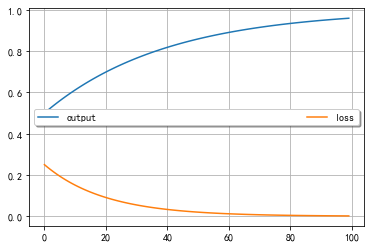

In [11]:
import matplotlib.pyplot as plt
plt.plot(outputs, label='output')
plt.plot(losses, label='loss')
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
plt.grid()
plt.show()